In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from joblib import dump
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('subcategories.csv')
X = df.drop('subcategory', axis=1)
y = df.subcategory

In [3]:
enc = OneHotEncoder(handle_unknown='ignore').fit(X)
X = enc.transform(X)

In [4]:
# To see the features
enc.get_feature_names()

array(['x0_Friday', 'x0_Monday', 'x0_Saturday', 'x0_Sunday',
       'x0_Thursday', 'x0_Tuesday', 'x0_Wednesday', 'x1_0', 'x1_6',
       'x1_7', 'x1_8', 'x1_9', 'x1_10', 'x1_11', 'x1_12', 'x1_13',
       'x1_14', 'x1_15', 'x1_16', 'x1_17', 'x1_18', 'x1_19', 'x1_20',
       'x1_21', 'x1_22', 'x1_23', 'x2_AT', 'x2_DE', 'x2_HK', 'x2_ID',
       'x2_JP', 'x2_KH', 'x2_MY', 'x2_NZ', 'x2_SG', 'x2_TH'], dtype=object)

In [5]:
clf = tree.DecisionTreeClassifier().fit(X, y)

In [11]:
y_pred = clf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Coffee       0.79      0.85      0.81        26
      Drinks       0.68      1.00      0.81        19
        Food       0.72      0.94      0.82       178
     Library       0.90      0.79      0.84        47
    Shopping       0.94      0.68      0.79       211

    accuracy                           0.81       481
   macro avg       0.81      0.85      0.81       481
weighted avg       0.84      0.81      0.81       481



In [23]:
truth_and_predicted = pd.concat([y, pd.Series(y_pred)], axis = 1).rename(columns={"subcategory": "truth", 0: "predicted"})

In [25]:
truth_and_predicted

,truth,predicted
0,Shopping,Shopping
1,Shopping,Shopping
2,Food,Food
3,Shopping,Drinks
4,Food,Food
...,...,...
476,Food,Food
477,Shopping,Shopping
478,Shopping,Shopping
479,Shopping,Food


In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(truth_and_predicted.loc[~(truth_and_predicted['truth'] == truth_and_predicted['predicted'])])

,truth,predicted
3,Shopping,Drinks
20,Shopping,Drinks
29,Food,Shopping
30,Shopping,Food
36,Shopping,Library
37,Shopping,Food
38,Shopping,Coffee
46,Shopping,Food
49,Library,Food
55,Library,Food


[Text(965.7692307692308, 951.3000000000001, 'x1_9 <= 0.5\nsamples = 481\nvalue = [26, 19, 178, 47, 211]\nclass = Shopping'),
 Text(515.0769230769231, 679.5, 'x2_ID <= 0.5\nsamples = 457\nvalue = [26, 19, 176, 28, 208]\nclass = Shopping'),
 Text(257.53846153846155, 407.70000000000005, 'x2_NZ <= 0.5\nsamples = 419\nvalue = [16, 16, 157, 28, 202]\nclass = Shopping'),
 Text(128.76923076923077, 135.89999999999998, '\n  (...)  \n'),
 Text(386.3076923076923, 135.89999999999998, '\n  (...)  \n'),
 Text(772.6153846153846, 407.70000000000005, 'x0_Wednesday <= 0.5\nsamples = 38\nvalue = [10, 3, 19, 0, 6]\nclass = Food'),
 Text(643.8461538461538, 135.89999999999998, '\n  (...)  \n'),
 Text(901.3846153846155, 135.89999999999998, '\n  (...)  \n'),
 Text(1416.4615384615386, 679.5, 'x2_NZ <= 0.5\nsamples = 24\nvalue = [0, 0, 2, 19, 3]\nclass = Library'),
 Text(1287.6923076923076, 407.70000000000005, 'x2_HK <= 0.5\nsamples = 5\nvalue = [0, 0, 2, 0, 3]\nclass = Shopping'),
 Text(1158.923076923077, 135.8

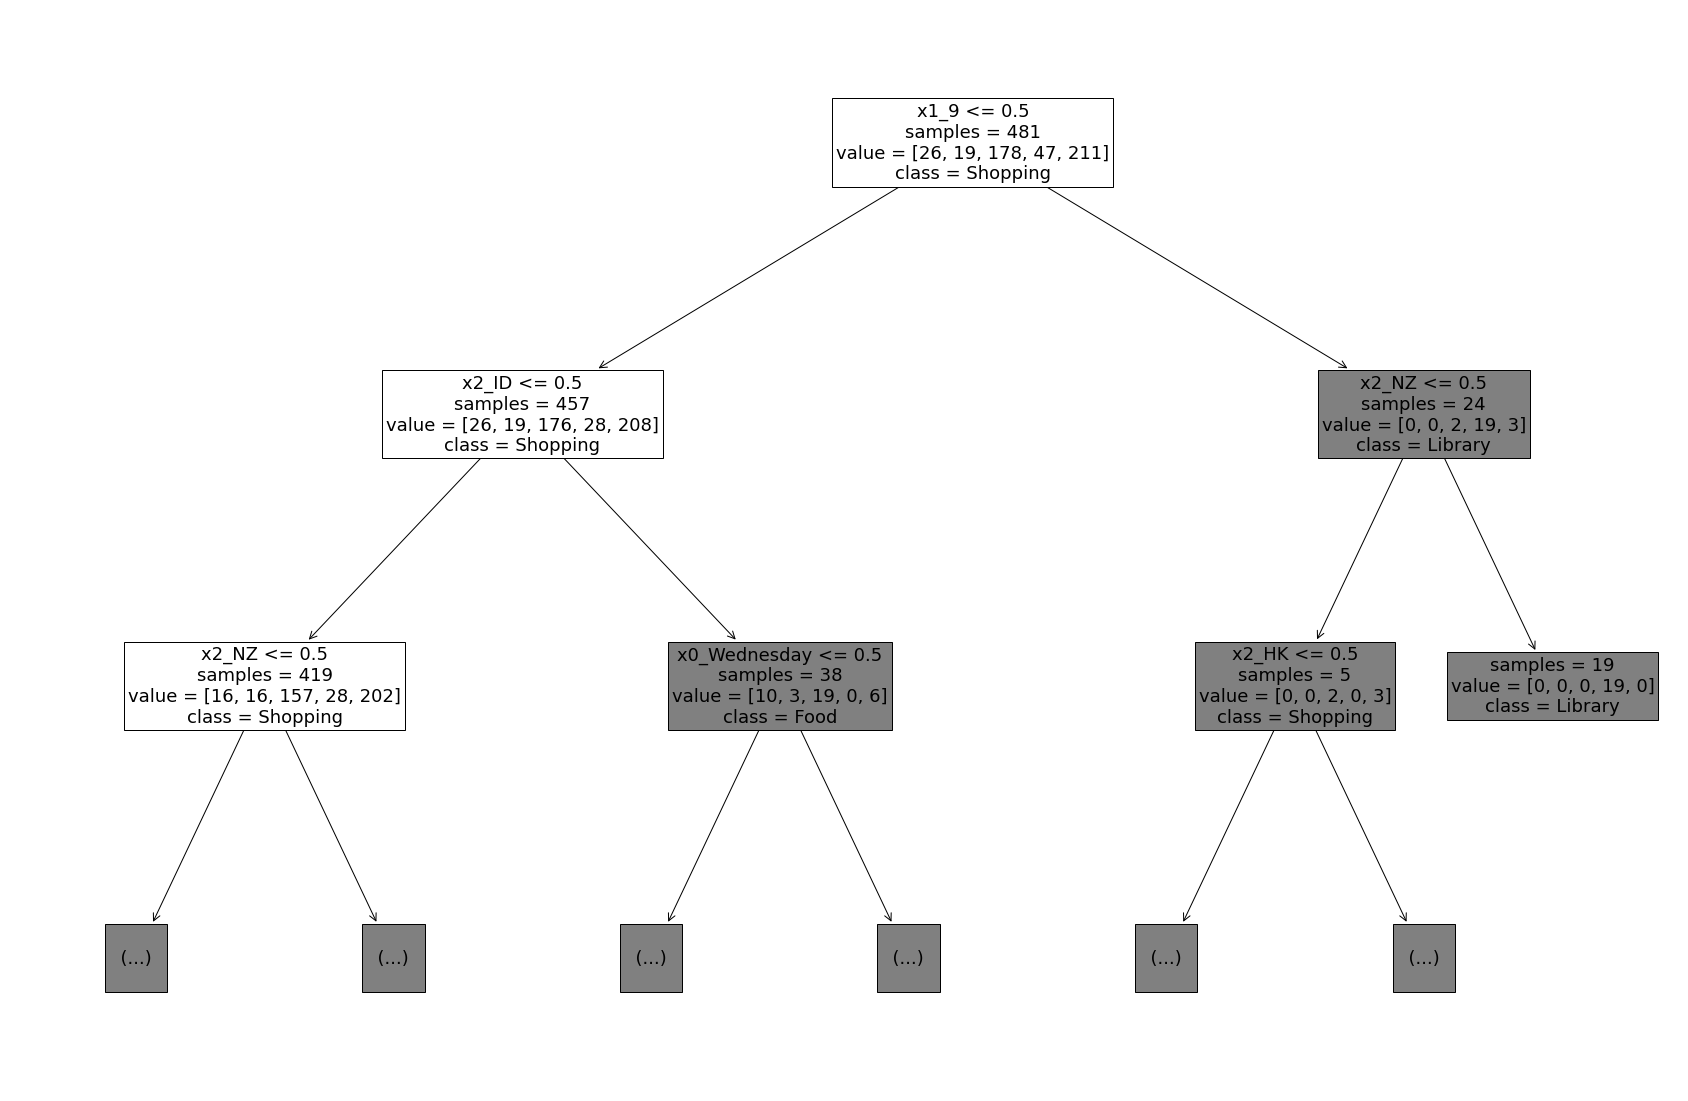

In [42]:
fig, ax = plt.subplots(figsize=(30, 20))
tree.plot_tree(clf, fontsize=18, max_depth=2,
               feature_names=enc.get_feature_names(),
               class_names=sorted(y.unique()),
               impurity=False)

[Text(2566.8990706244986, 1278.5472000000002, 'X[11] <= 0.5\ngini = 0.657\nsamples = 481\nvalue = [26, 19, 178, 47, 211]'),
 Text(2377.514153333589, 1226.3616000000002, 'X[29] <= 0.5\ngini = 0.636\nsamples = 457\nvalue = [26, 19, 176, 28, 208]'),
 Text(2083.0343489632505, 1174.1760000000002, 'X[33] <= 0.5\ngini = 0.62\nsamples = 419\nvalue = [16, 16, 157, 28, 202]'),
 Text(1704.610492441229, 1121.9904000000001, 'X[31] <= 0.5\ngini = 0.559\nsamples = 299\nvalue = [12, 7, 118, 3, 159]'),
 Text(1687.7524863989331, 1069.8048000000001, 'X[17] <= 0.5\ngini = 0.557\nsamples = 292\nvalue = [12, 7, 111, 3, 159]'),
 Text(1470.5502900184101, 1017.6192000000001, 'X[28] <= 0.5\ngini = 0.555\nsamples = 267\nvalue = [9, 6, 107, 3, 142]'),
 Text(1213.1549607014729, 965.4336000000001, 'X[32] <= 0.5\ngini = 0.552\nsamples = 246\nvalue = [9, 5, 95, 3, 134]'),
 Text(898.7424471299094, 913.248, 'X[34] <= 0.5\ngini = 0.525\nsamples = 159\nvalue = [3, 3, 56, 3, 94]'),
 Text(682.749244712991, 861.0624, 'X[14]

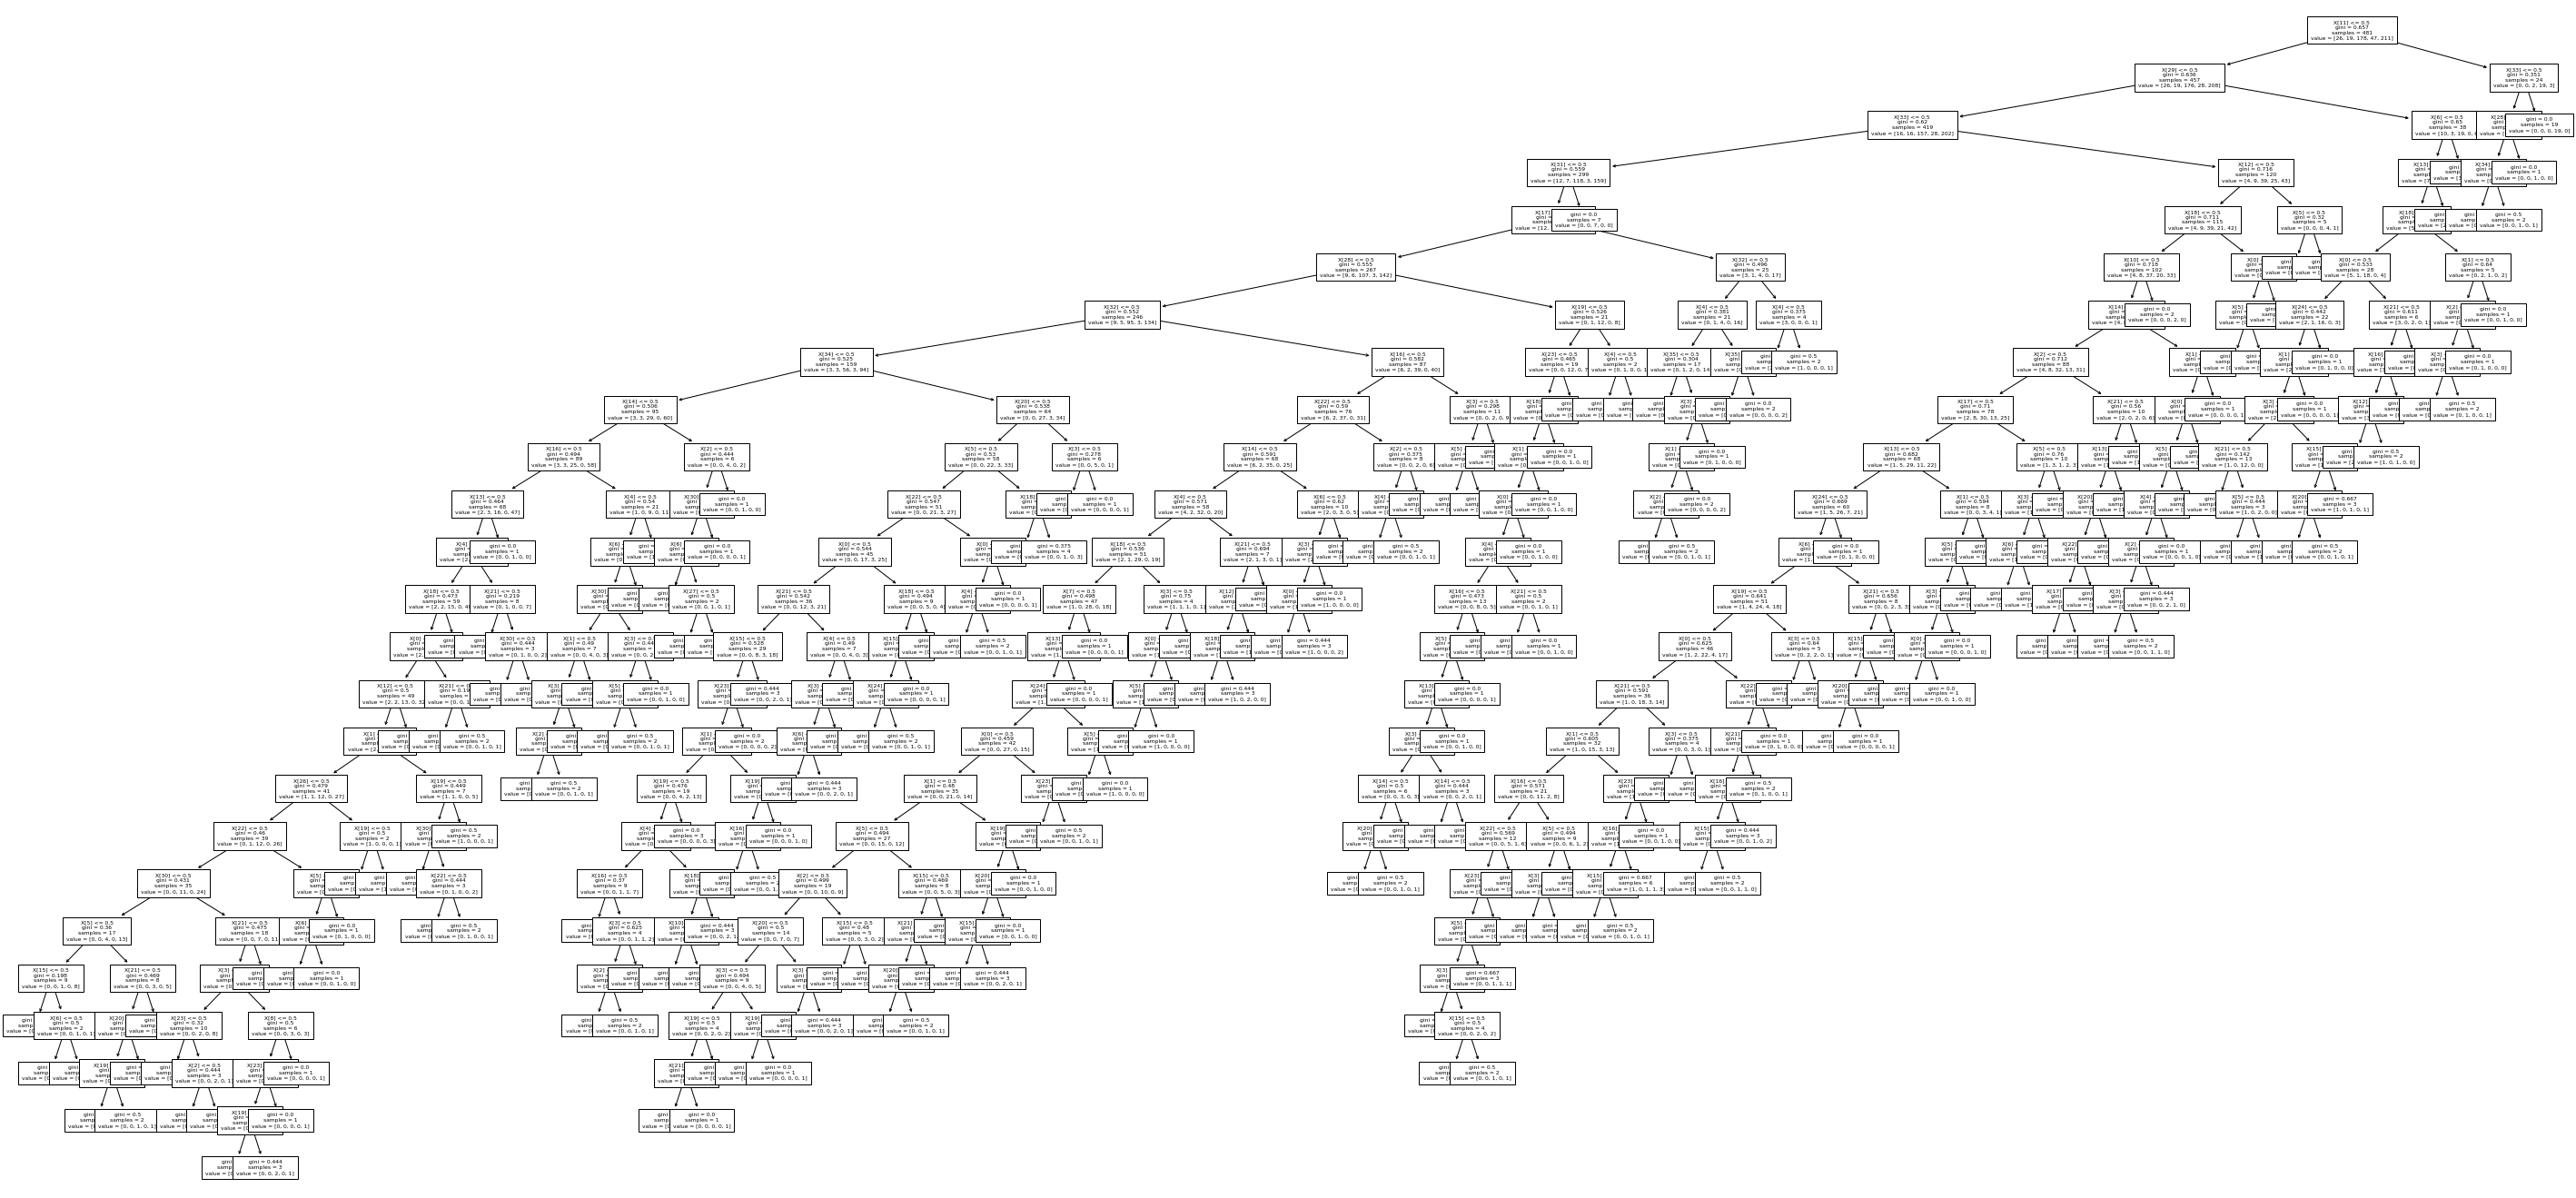

In [43]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, fontsize=6)